# US county-level sociodemographic and health

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from pickle import dump

## Problem statement and data collection

In [240]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

total_data.to_csv("/workspaces/ml-regularized-linear/data/raw/demographic_health_data.csv", index = False)

total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


## Exploration and data cleaning

In [241]:
erace_columns = [c for c in total_data.columns if "%" in c or "percent" in c.lower() or "CI" in c or c[0].isdigit() or "201" in c or "alone" in c]

erace_columns.extend(["fips", "Total Population", "Two or more races pop", "Urban_rural_code", "COUNTY_NAME"])

erace_columns

['0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of adults with less 

In [242]:
total_data.drop(erace_columns, axis = 1, inplace=True)

In [243]:
total_data.shape

(3140, 18)

In [244]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOT_POP                   3140 non-null   int64  
 1   ICU Beds_x                3140 non-null   int64  
 2   Population Aged 60+       3140 non-null   int64  
 3   STATE_NAME                3140 non-null   object 
 4   STATE_FIPS                3140 non-null   int64  
 5   CNTY_FIPS                 3140 non-null   int64  
 6   anycondition_prevalence   3140 non-null   float64
 7   anycondition_number       3140 non-null   int64  
 8   Obesity_prevalence        3140 non-null   float64
 9   Obesity_number            3140 non-null   int64  
 10  Heart disease_prevalence  3140 non-null   float64
 11  Heart disease_number      3140 non-null   int64  
 12  COPD_prevalence           3140 non-null   float64
 13  COPD_number               3140 non-null   int64  
 14  diabetes

In [245]:
categorical_qty = 0
categoric_column = []
numeric_qty = 0
numeric_column = []

for column, dtype in total_data.dtypes.items():
    if dtype == "object" or dtype == "bool":
        categorical_qty += 1
        categoric_column.append(column)
    elif dtype == "int64" or dtype == "float64":
        numeric_qty += 1
        numeric_column.append(column) 

def categorical(): 
    print(f"there is {categorical_qty} categorical variables = {categoric_column}")

def numeric(): 
    print(f"there is {numeric_qty} categorical variables = {numeric_column}")

In [246]:
target = "Heart disease_number"

-There are a total of 3.140 rows and 17 columns, among which we find the target or class to predict, Heart disease_number

-The variables always have a value.

-The data has 19 numerical characteristics and 1 categorical characteristics.

## Count and eliminate duplicates

In [247]:
duplicated_count = total_data.duplicated().sum()
duplicated_count

0

In [248]:
total_data.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
0,55601,6,10523,Alabama,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326
1,218022,51,53519,Alabama,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479
2,24881,5,6150,Alabama,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887
3,22400,0,4773,Alabama,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595
4,57840,6,13600,Alabama,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507


## Analysis of univariate variables

### Analysis on categorical variables

In [249]:
categorical()

there is 1 categorical variables = ['STATE_NAME']


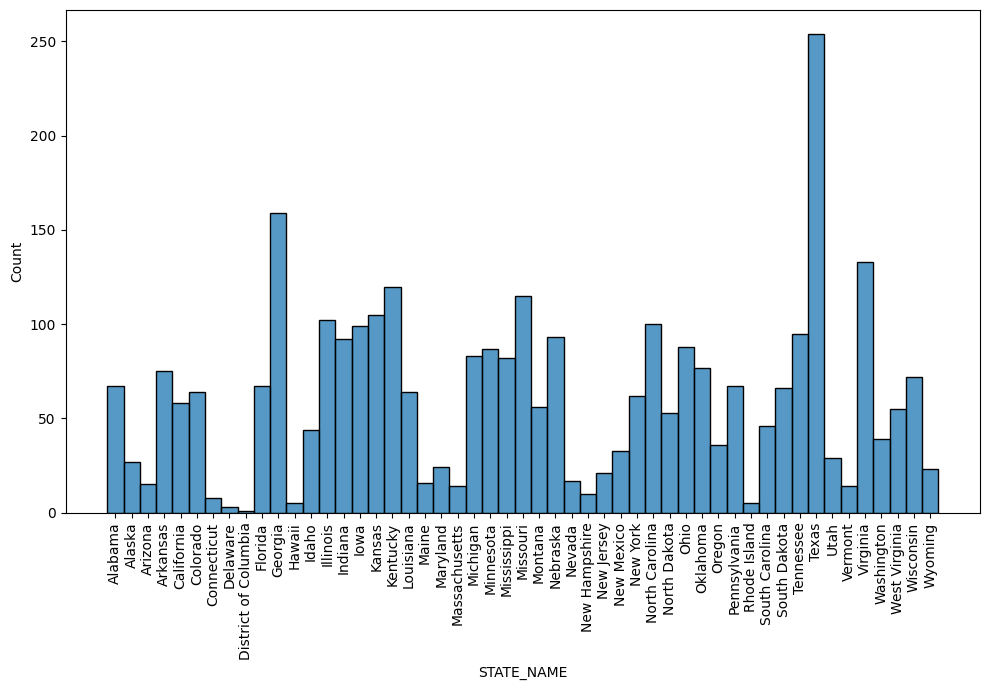

In [250]:
plt.figure(figsize= (10, 7))

# Create a multiple histogram
sns.histplot(data = total_data, x = categoric_column[0])

# Label rotation
plt.tick_params(axis='x', labelrotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In this graph, we observe that the state with the most data is Texas

### Analysis on numeric variables

In [251]:
numeric()

there is 17 categorical variables = ['TOT_POP', 'ICU Beds_x', 'Population Aged 60+', 'STATE_FIPS', 'CNTY_FIPS', 'anycondition_prevalence', 'anycondition_number', 'Obesity_prevalence', 'Obesity_number', 'Heart disease_prevalence', 'Heart disease_number', 'COPD_prevalence', 'COPD_number', 'diabetes_prevalence', 'diabetes_number', 'CKD_prevalence', 'CKD_number']


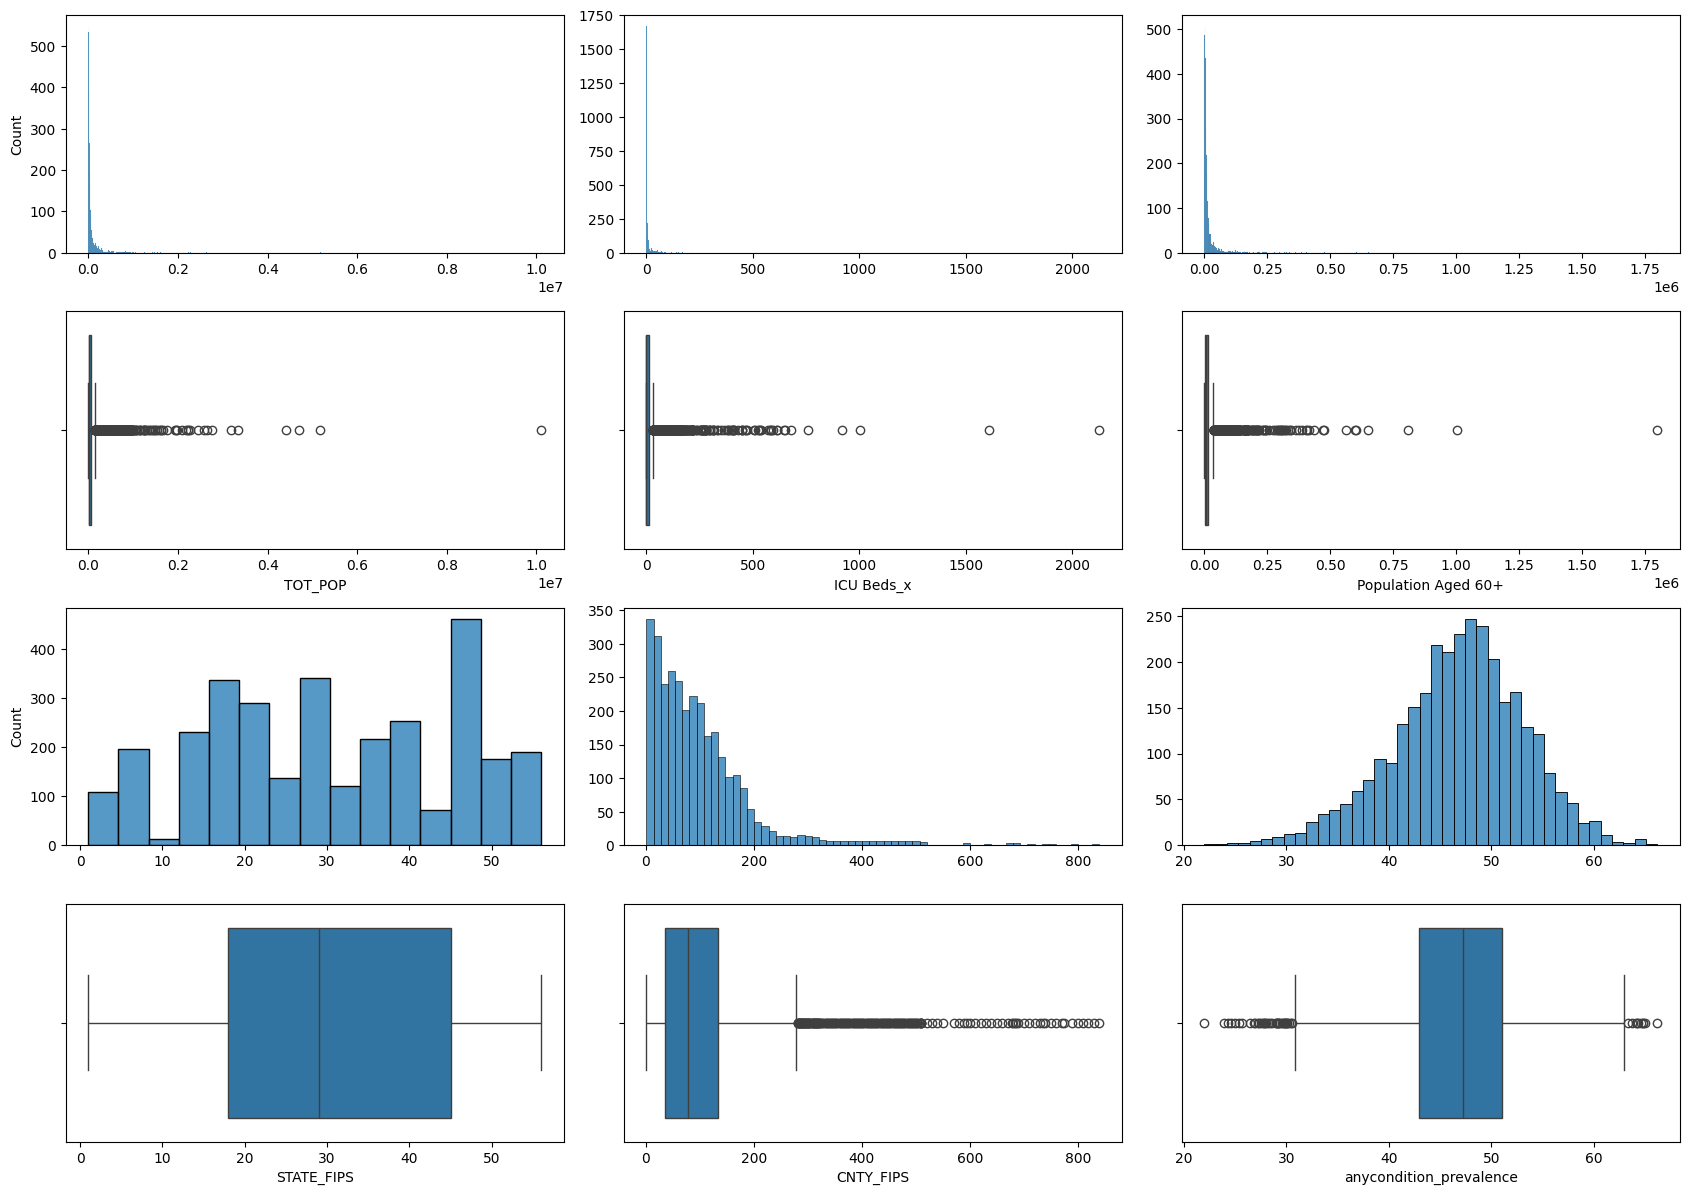

In [252]:
fig, axis = plt.subplots(4, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = numeric_column[0]).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = numeric_column[0])
sns.histplot(ax = axis[0, 1], data = total_data, x = numeric_column[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = numeric_column[1])
sns.histplot(ax = axis[0, 2], data = total_data, x = numeric_column[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = numeric_column[2])
sns.histplot(ax = axis[2, 0], data = total_data, x = numeric_column[3]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = numeric_column[3])
sns.histplot(ax = axis[2, 1], data = total_data, x = numeric_column[4]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = numeric_column[4])
sns.histplot(ax = axis[2, 2], data = total_data, x = numeric_column[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = numeric_column[5])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

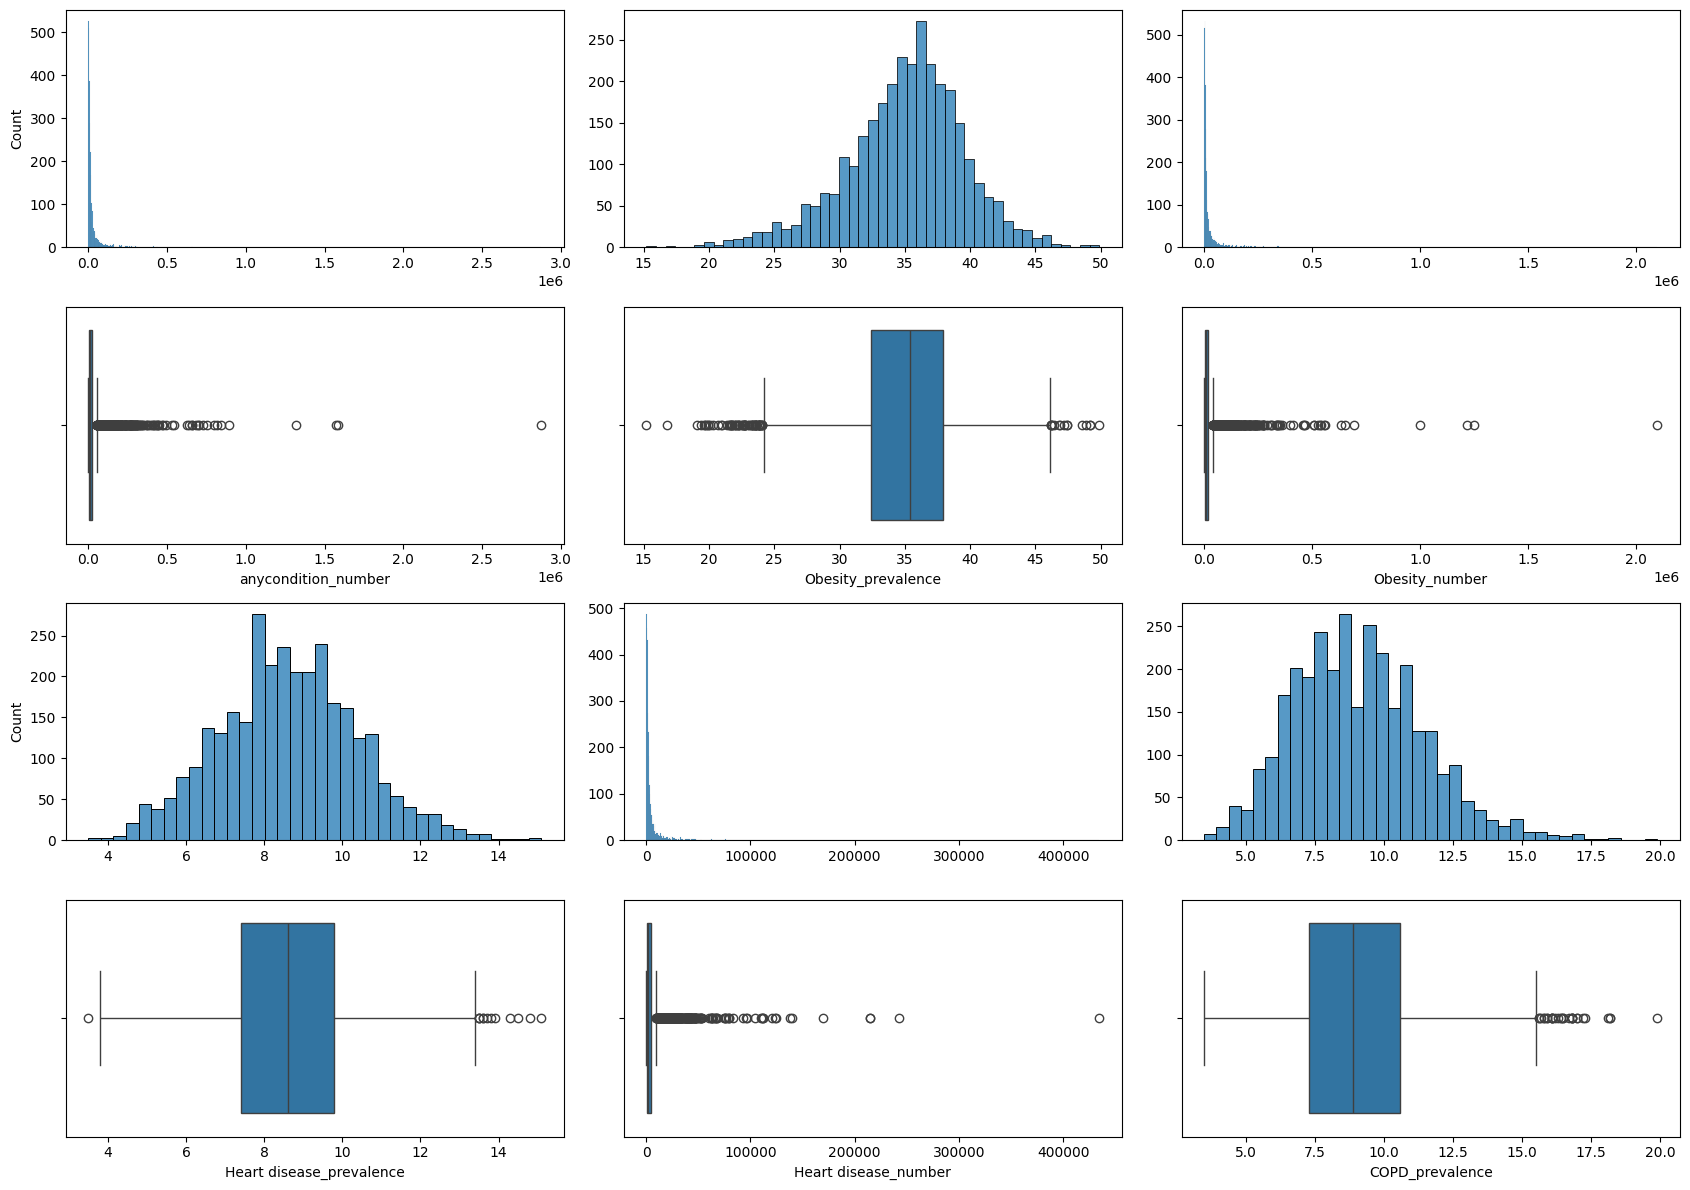

In [253]:
fig, axis = plt.subplots(4, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = numeric_column[6]).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = numeric_column[6])
sns.histplot(ax = axis[0, 1], data = total_data, x = numeric_column[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = numeric_column[7])
sns.histplot(ax = axis[0, 2], data = total_data, x = numeric_column[8]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = numeric_column[8])
sns.histplot(ax = axis[2, 0], data = total_data, x = numeric_column[9]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = numeric_column[9])
sns.histplot(ax = axis[2, 1], data = total_data, x = numeric_column[10]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = numeric_column[10])
sns.histplot(ax = axis[2, 2], data = total_data, x = numeric_column[11]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = numeric_column[11])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

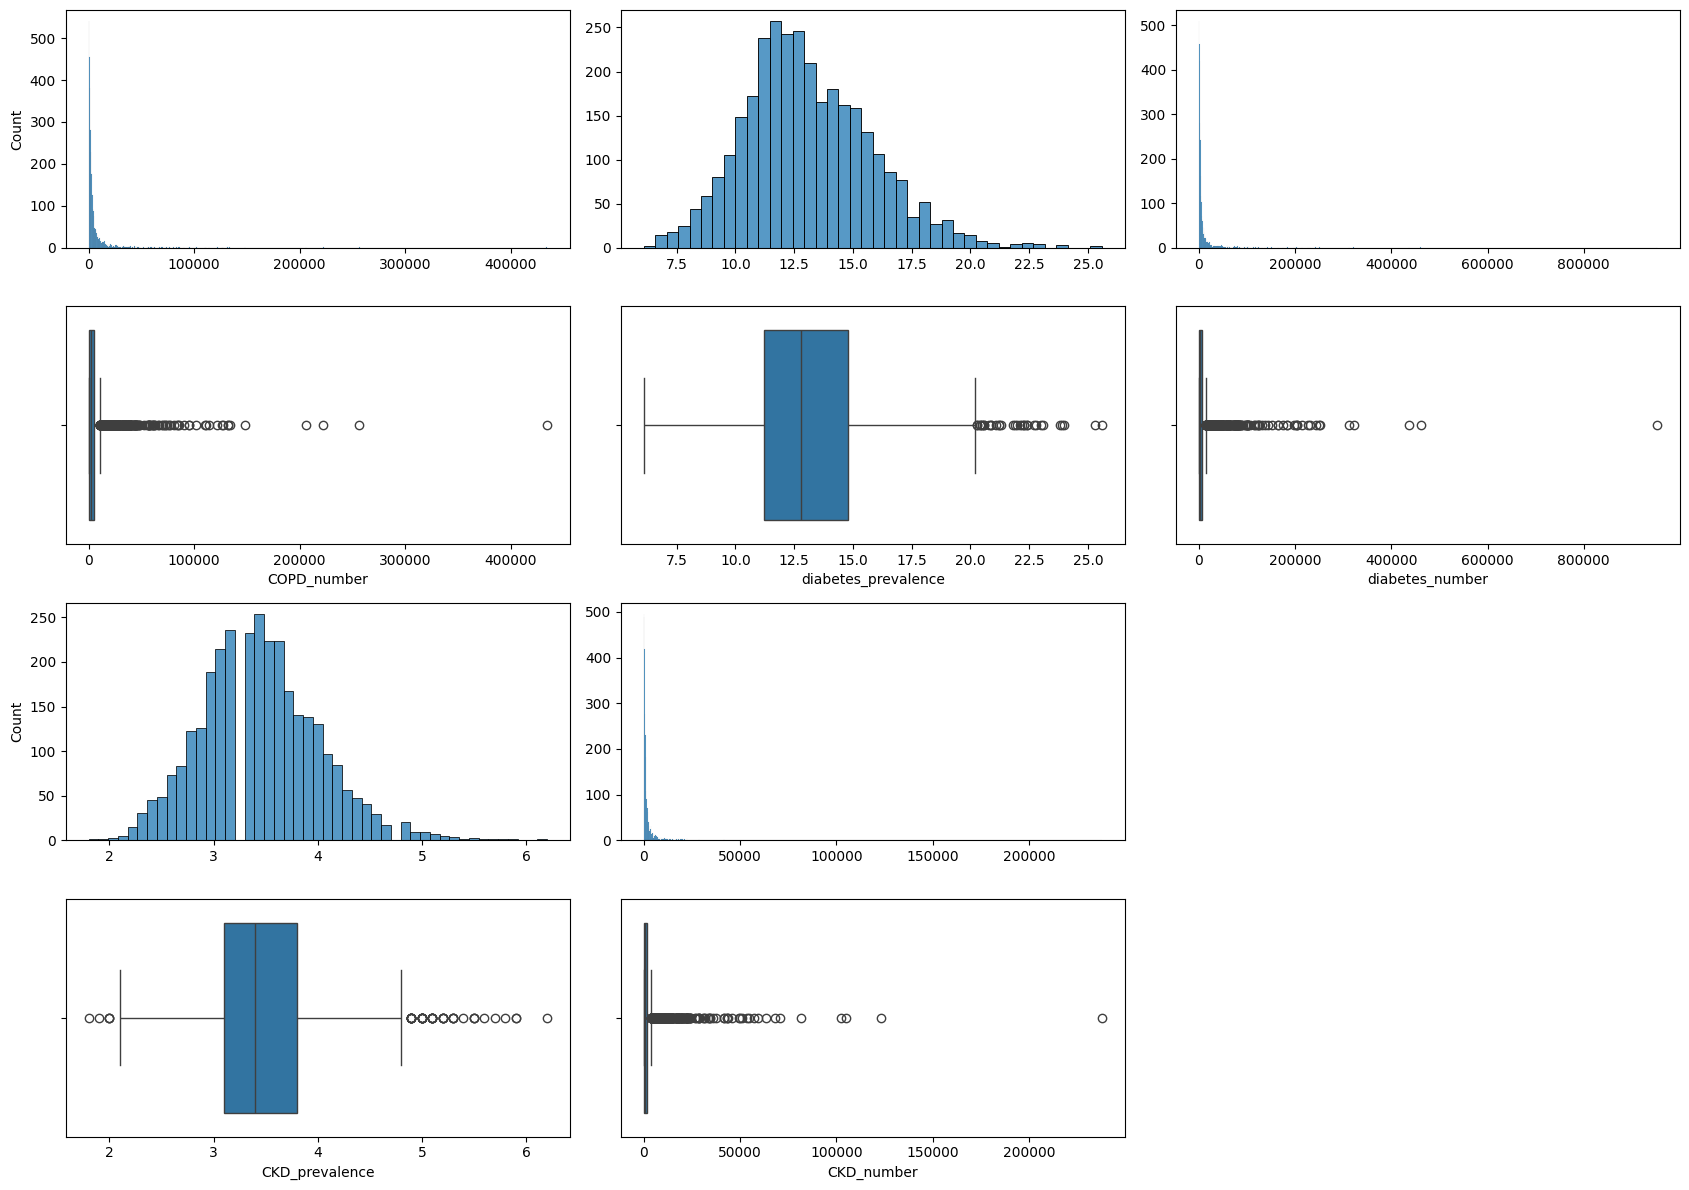

In [254]:
fig, axis = plt.subplots(4, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = numeric_column[12]).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = numeric_column[12])
sns.histplot(ax = axis[0, 1], data = total_data, x = numeric_column[13]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = numeric_column[13])
sns.histplot(ax = axis[0, 2], data = total_data, x = numeric_column[14]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = numeric_column[14])
sns.histplot(ax = axis[2, 0], data = total_data, x = numeric_column[15]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = numeric_column[15])
sns.histplot(ax = axis[2, 1], data = total_data, x = numeric_column[16]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = numeric_column[16])

# Delete axis
plt.delaxes(ax = axis[2, 2])
plt.delaxes(ax = axis[3, 2])

# Adjust the layout
plt.tight_layout()

## Analysis of multivariate variables

### Numerical-numerical analysis

In [255]:
numeric_column

['TOT_POP',
 'ICU Beds_x',
 'Population Aged 60+',
 'STATE_FIPS',
 'CNTY_FIPS',
 'anycondition_prevalence',
 'anycondition_number',
 'Obesity_prevalence',
 'Obesity_number',
 'Heart disease_prevalence',
 'Heart disease_number',
 'COPD_prevalence',
 'COPD_number',
 'diabetes_prevalence',
 'diabetes_number',
 'CKD_prevalence',
 'CKD_number']

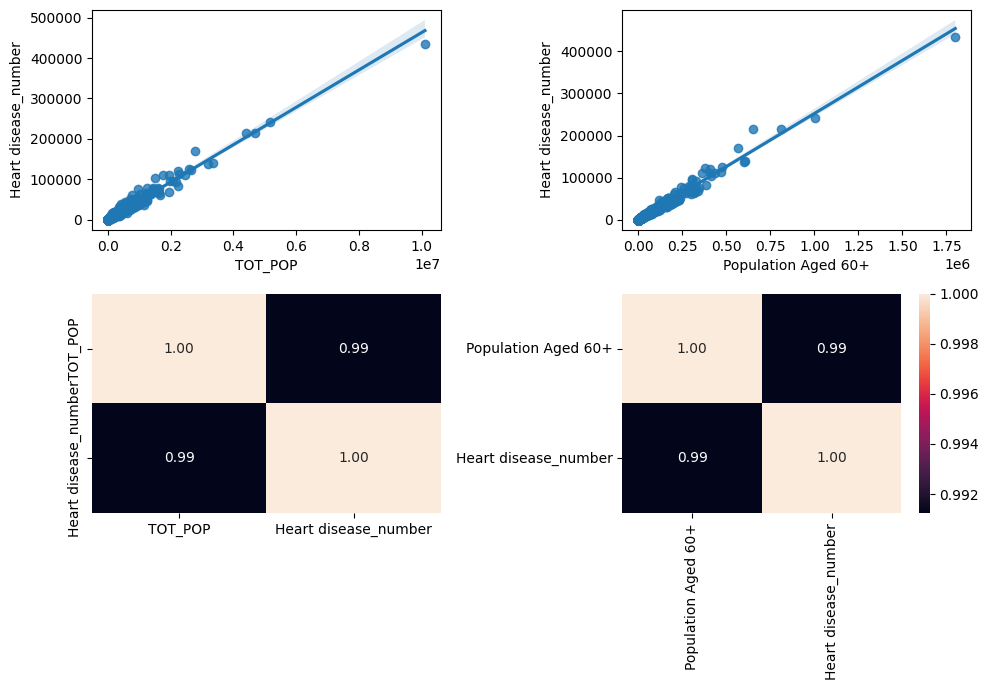

In [256]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[0], y = target)
sns.heatmap(total_data[[numeric_column[0], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[2], y = target)
sns.heatmap(total_data[[numeric_column[2], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

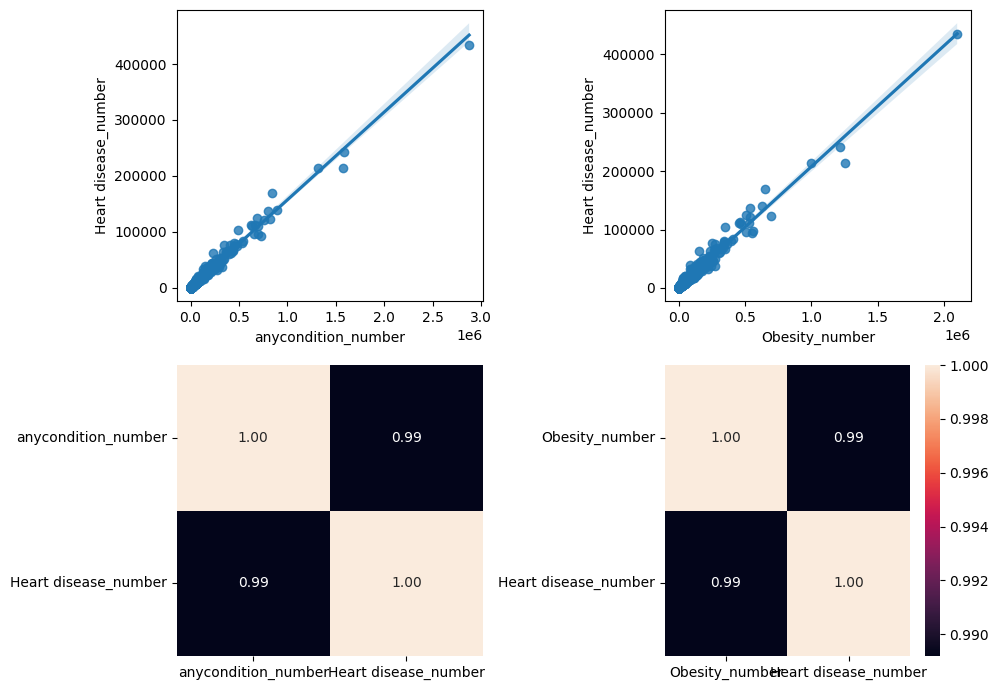

In [257]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[6], y = target)
sns.heatmap(total_data[[numeric_column[6], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[8], y = target)
sns.heatmap(total_data[[numeric_column[8], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

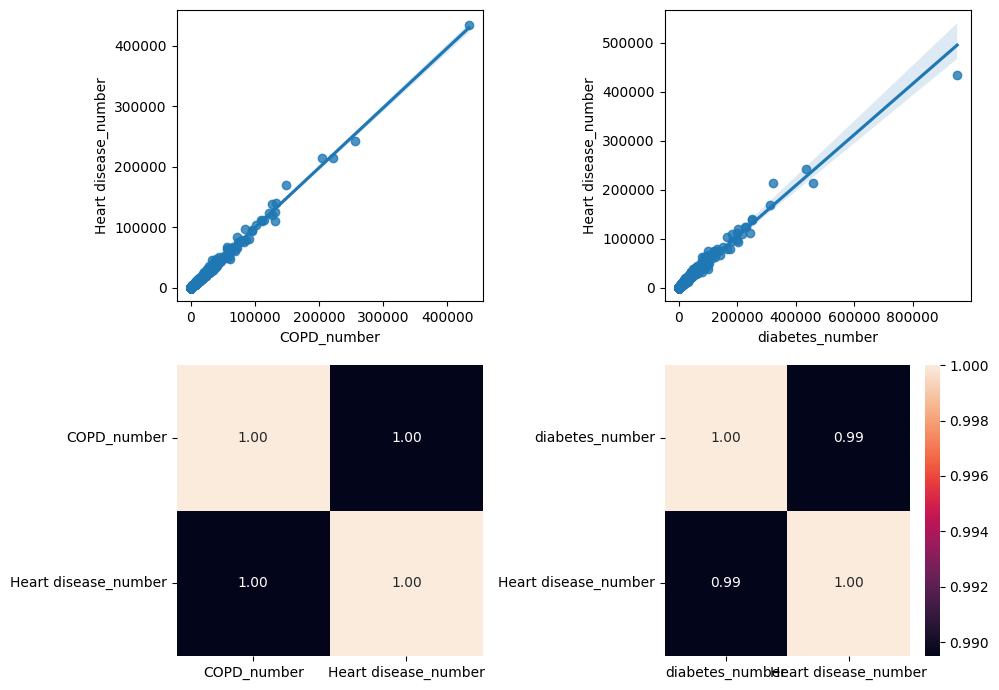

In [258]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[12], y = target)
sns.heatmap(total_data[[numeric_column[12], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[14], y = target)
sns.heatmap(total_data[[numeric_column[14], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

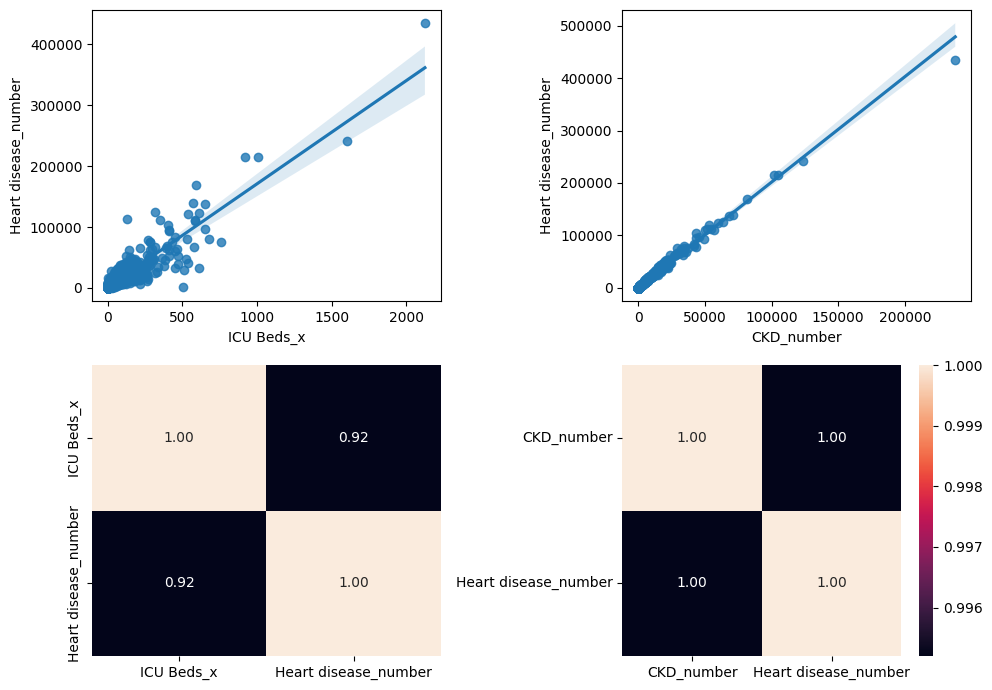

In [259]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[1], y = target)
sns.heatmap(total_data[[numeric_column[1], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[16], y = target)
sns.heatmap(total_data[[numeric_column[16], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

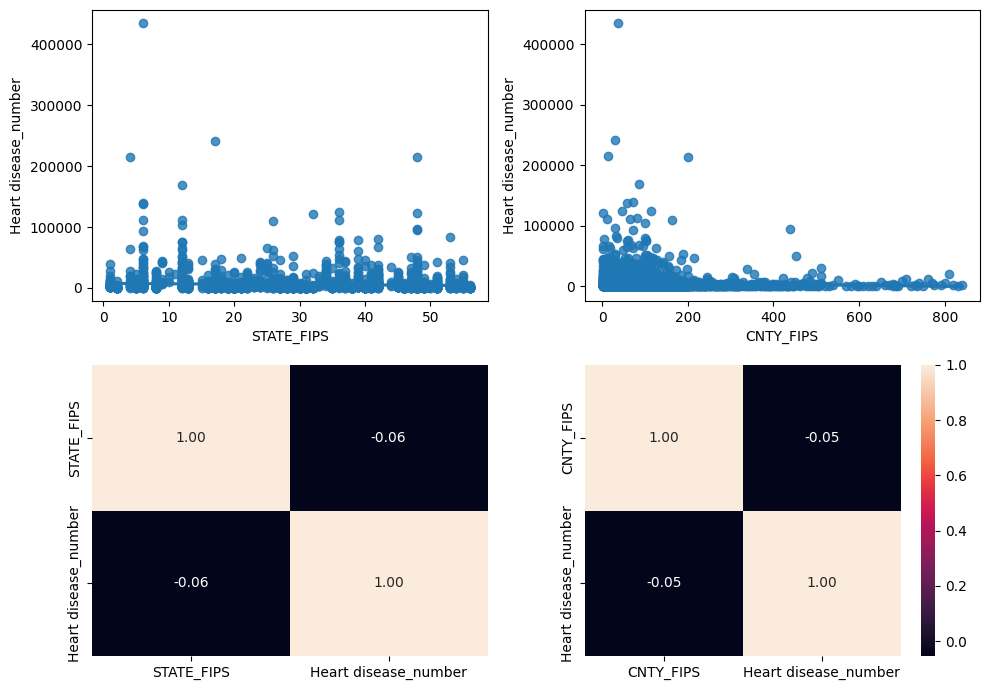

In [260]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[3], y = target)
sns.heatmap(total_data[[numeric_column[3], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[4], y = target)
sns.heatmap(total_data[[numeric_column[4], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the previous graphs, we can observe a direct correlation between different health conditions such as obesity, anycondition, COPD, diabetes, and CKD with Heart Disease, as well as with ICU Beds qty per county.

In the last two graphs, it's evident that there's no correlation between County and State regarding Heart Disease.

### Combinations of class with various predictors.

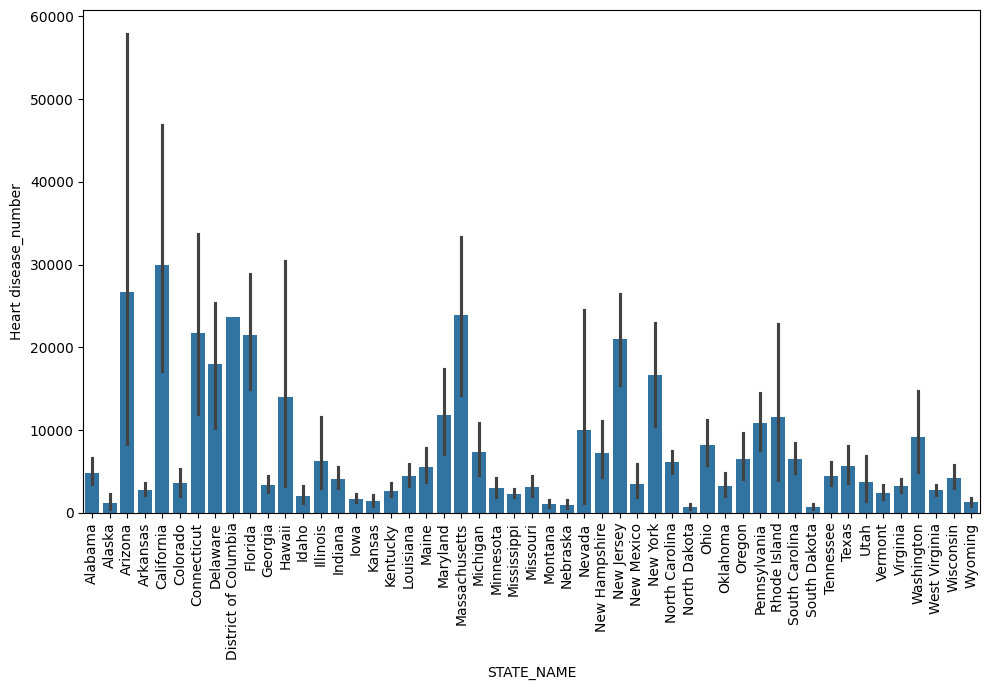

In [261]:
plt.figure(figsize=(10, 7))

sns.barplot(data = total_data, x = "STATE_NAME", y = target)

plt.tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()

plt.show()

### Correlation analysis

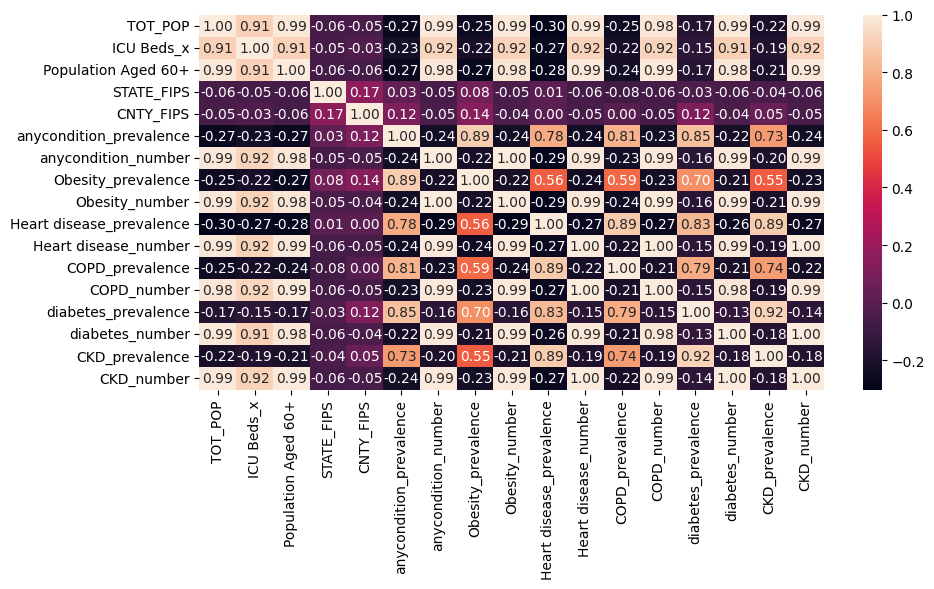

In [262]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[numeric_column].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

## Feature engineering

### Outlier analysis

In [263]:
total_data[numeric_column].describe()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
count,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,23.817516,2.132298e+04,30.298089,103.551592,46.793917,3.338540e+04,35.019299,2.527613e+04,8.607803,5597.593312,9.095223,5827.242357,13.073503,9326.577707,3.446242,2466.234076
std,3.335834e+05,84.602028,6.140588e+04,15.132325,107.689584,6.379448,9.888669e+04,4.517088,7.446684e+04,1.758587,15615.285499,2.344965,15720.551934,2.724351,29754.601185,0.568059,7730.422067
min,8.800000e+01,0.000000,2.700000e+01,1.000000,1.000000,22.000000,4.100000e+01,15.200000,2.500000e+01,3.500000,7.000000,3.500000,7.000000,6.100000,11.000000,1.800000,3.000000
25%,1.096325e+04,0.000000,2.814750e+03,18.000000,35.000000,42.900000,4.215000e+03,32.400000,3.075000e+03,7.400000,798.500000,7.300000,815.000000,11.200000,1187.750000,3.100000,314.750000
50%,2.580050e+04,0.000000,6.310000e+03,29.000000,79.000000,47.200000,9.753000e+03,35.400000,7.182500e+03,8.600000,1814.500000,8.900000,1963.500000,12.800000,2743.000000,3.400000,718.000000
75%,6.791300e+04,12.000000,1.610625e+04,45.000000,133.000000,51.000000,2.500125e+04,37.900000,1.854250e+04,9.800000,4376.000000,10.600000,4727.000000,14.800000,6679.250000,3.800000,1776.250000
max,1.010552e+07,2126.000000,1.800341e+06,56.000000,840.000000,66.200000,2.877316e+06,49.900000,2.097906e+06,15.100000,434790.000000,19.900000,434075.000000,25.600000,952335.000000,6.200000,237766.000000


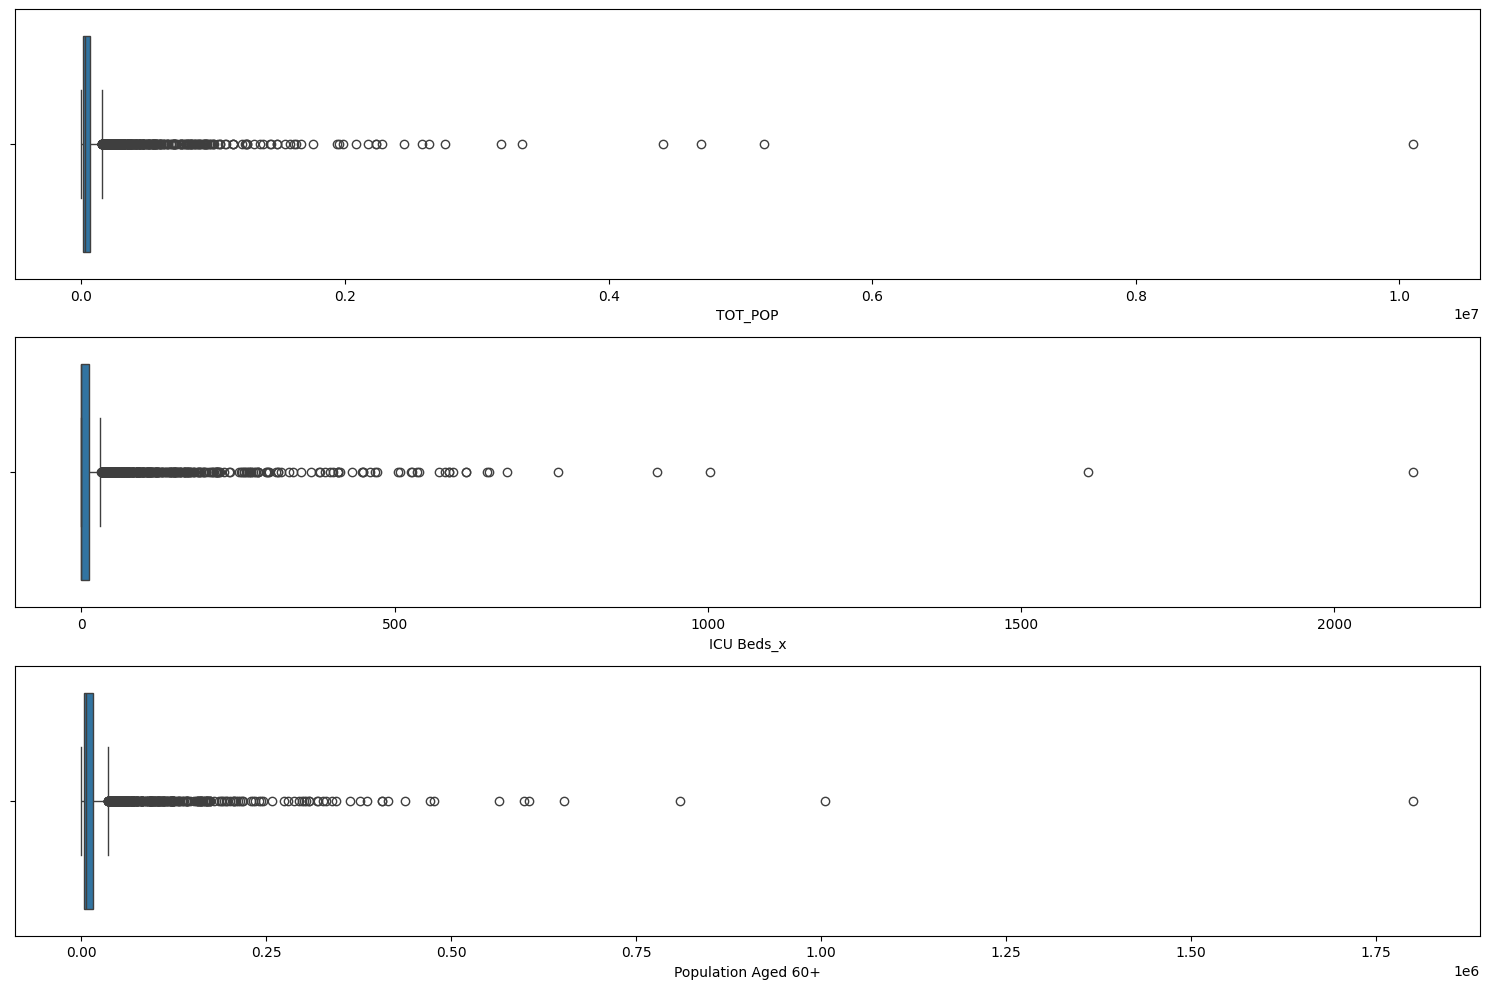

In [264]:
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = total_data, x = numeric_column[0])
sns.boxplot(ax = axis[1], data = total_data, x = numeric_column[1])
sns.boxplot(ax = axis[2], data = total_data, x = numeric_column[2])

plt.tight_layout()

plt.show()

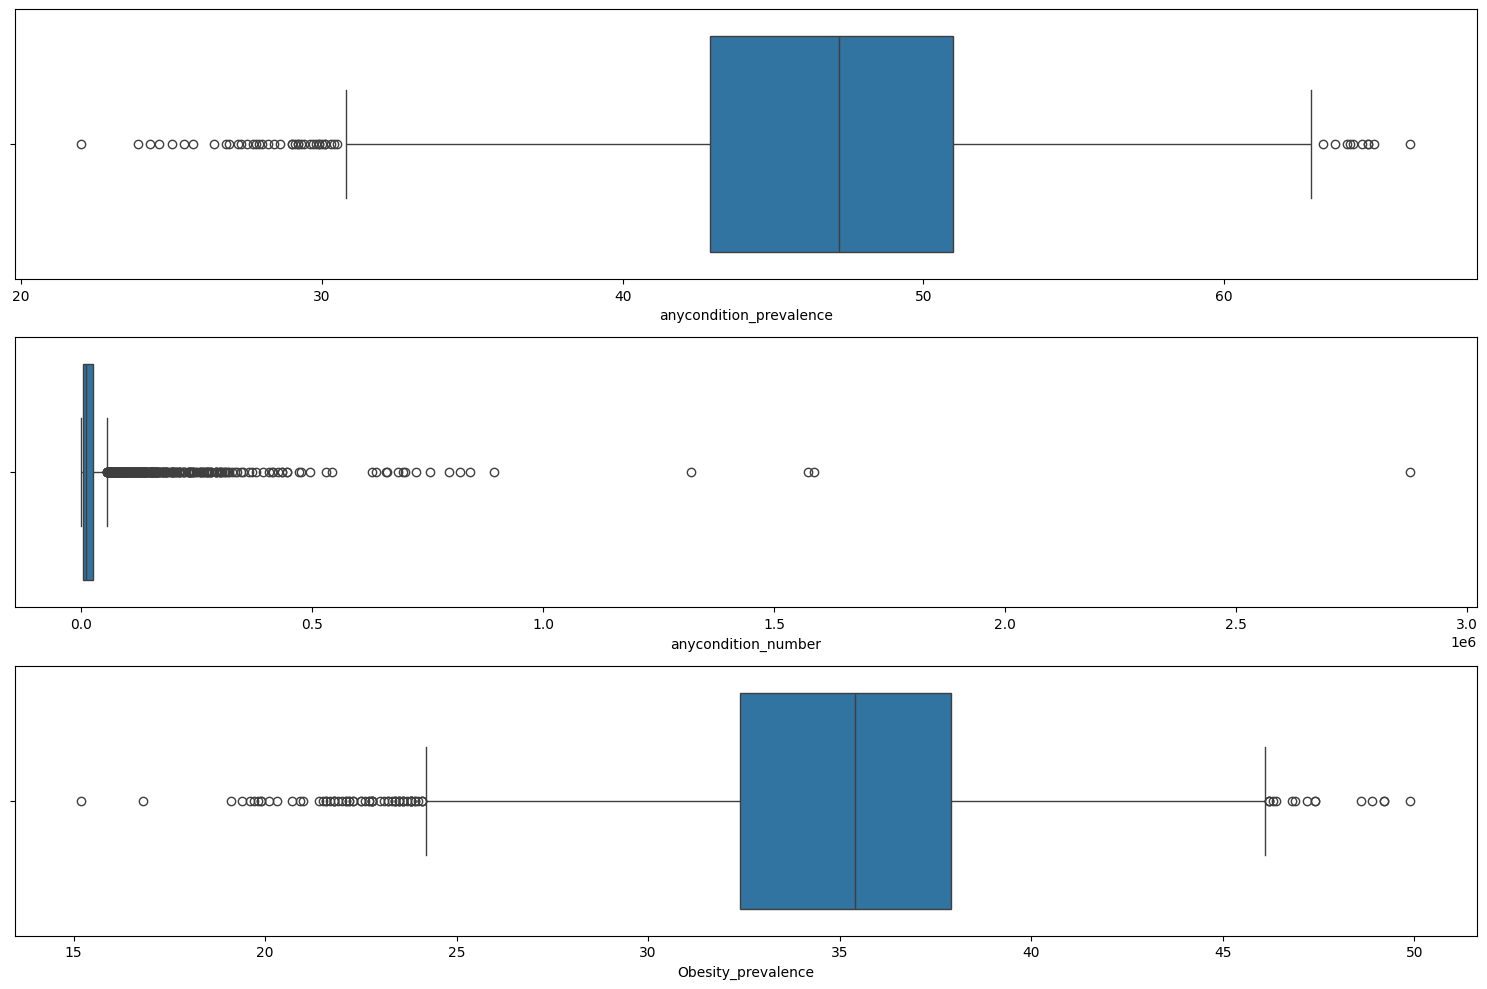

In [265]:
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = total_data, x = numeric_column[5])
sns.boxplot(ax = axis[1], data = total_data, x = numeric_column[6])
sns.boxplot(ax = axis[2], data = total_data, x = numeric_column[7])

plt.tight_layout()

plt.show()

### Feature scaling

Divide the dataset

In [266]:
# We divide the dataset into training and test samples.
X = total_data[numeric_column].drop(target, axis = 1)
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

X_train.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
57,88690,6,18943,1,115,53.1,36408,38.0,26054,8.3,9.8,6712,13.0,8914,3.2,2181
1814,39006,8,9932,35,39,47.0,14031,33.8,10101,8.5,7.3,2172,17.2,5134,4.4,1304
2855,15631,0,4703,51,77,53.5,6969,38.7,5038,10.7,11.7,1519,14.6,1902,4.0,520
2276,210793,51,54892,42,69,42.8,71785,30.8,51605,8.0,8.4,14087,11.5,19253,3.2,5367
2619,3922,0,1077,48,197,50.3,1552,37.6,1160,10.3,10.0,309,15.4,474,3.9,122


In [267]:
X_train.to_csv("/workspaces/ml-regularized-linear/data/interim/us_train_x.csv", index=False)
y_train.to_csv("/workspaces/ml-regularized-linear/data/interim/us_train_y.csv", index=False)

X_test.to_csv("/workspaces/ml-regularized-linear/data/interim/us_test_x.csv", index=False)
y_test.to_csv("/workspaces/ml-regularized-linear/data/interim/us_test_y.csv", index=False)

In [268]:
num_variables = numeric_column
num_variables.remove(target)

In [270]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

scal_features_train = scaler.transform(X_train)
scal_features_test = scaler.transform(X_test)

X_train_scal = pd.DataFrame(scal_features_train, index = X_train.index, columns = num_variables)
X_test_scal = pd.DataFrame(scal_features_test, index = X_test.index, columns = num_variables)

dump(scaler, open("/workspaces/ml-regularized-linear/models/scaler.pk", "wb"))

X_train_scal.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
57,0.016285,-0.245872,0.025800,-1.934417,0.136190,0.939915,0.147761,0.642242,0.110275,-0.192346,0.258446,0.175363,-0.025079,0.076451,-0.415694,0.033039
1814,-0.239594,-0.213158,-0.209903,0.301921,-0.611116,0.007561,-0.235681,-0.290805,-0.248213,-0.082100,-0.762763,-0.279762,1.449273,-0.147417,1.608865,-0.161848
2855,-0.359979,-0.344012,-0.346680,1.354315,-0.237463,1.001053,-0.356693,0.797750,-0.361986,1.130609,1.034565,-0.345224,0.536579,-0.338830,0.934012,-0.336068
2276,0.645133,0.490181,0.966129,0.762343,-0.316127,-0.634388,0.753965,-0.957267,0.684445,-0.357715,-0.313431,0.914692,-0.551634,0.688771,-0.415694,0.741029
2619,-0.420282,-0.344012,-0.441526,1.156991,0.942493,0.511949,-0.449516,0.553380,-0.449131,0.910117,0.340143,-0.466524,0.817408,-0.423402,0.765299,-0.424511


In [271]:
X_train_scal.to_csv("/workspaces/ml-regularized-linear/data/interim/us_train_x_scal.csv", index=False)
X_test_scal.to_csv("/workspaces/ml-regularized-linear/data/interim/us_test_x_scal.csv", index=False)

## Feature selection

In [273]:

selection_model = SelectKBest(f_regression, k= (int(len(X_train.columns)*0.70)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

dump(selection_model, open("/workspaces/ml-regularized-linear/models/selection_model_70.pk", "wb"))

X_train_sel.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_number,diabetes_number,CKD_number,y
0,88690.0,6.0,18943.0,53.1,36408.0,38.0,26054.0,8.3,6712.0,8914.0,2181.0,5711
1,39006.0,8.0,9932.0,47.0,14031.0,33.8,10101.0,8.5,2172.0,5134.0,1304.0,2546
2,15631.0,0.0,4703.0,53.5,6969.0,38.7,5038.0,10.7,1519.0,1902.0,520.0,1398
3,210793.0,51.0,54892.0,42.8,71785.0,30.8,51605.0,8.0,14087.0,19253.0,5367.0,13334
4,3922.0,0.0,1077.0,50.3,1552.0,37.6,1160.0,10.3,309.0,474.0,122.0,319


In [274]:
X_train_sel.to_csv("/workspaces/ml-regularized-linear/data/processed/us_train_sel_70.csv", index=False)
X_test_sel.to_csv("/workspaces/ml-regularized-linear/data/processed/us_test_sel_70.csv", index=False)

In [275]:
selection_model = SelectKBest(f_regression, k= (int(len(X_train.columns)*0.80)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

dump(selection_model, open("/workspaces/ml-regularized-linear/models/selection_model_80.pk", "wb"))

X_train_sel.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_number,CKD_number,y
0,88690.0,6.0,18943.0,53.1,36408.0,38.0,26054.0,8.3,9.8,6712.0,8914.0,2181.0,5711
1,39006.0,8.0,9932.0,47.0,14031.0,33.8,10101.0,8.5,7.3,2172.0,5134.0,1304.0,2546
2,15631.0,0.0,4703.0,53.5,6969.0,38.7,5038.0,10.7,11.7,1519.0,1902.0,520.0,1398
3,210793.0,51.0,54892.0,42.8,71785.0,30.8,51605.0,8.0,8.4,14087.0,19253.0,5367.0,13334
4,3922.0,0.0,1077.0,50.3,1552.0,37.6,1160.0,10.3,10.0,309.0,474.0,122.0,319


In [276]:
X_train_sel.to_csv("/workspaces/ml-regularized-linear/data/processed/us_train_sel_80.csv", index=False)
X_test_sel.to_csv("/workspaces/ml-regularized-linear/data/processed/us_test_sel_80.csv", index=False)